# Sales Analysis

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

#### Merging 12 months of sales data into single CSV file

In [11]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("./Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

### Read in updated dataframe

In [12]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean up data.

#### 1. Drop rows of NAN

In [16]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')

#### 2. Find 'Or' and delete it

In [19]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### 3. Convert columns to correct type

In [21]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment the data with some additional columns

#### 1. Add month column

In [22]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('Int32')

#### 2. Add sales column

In [25]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### 3. Add a city column

In [51]:
def get_city(address):
    return address.split(', ')[1]

# To avoid duplicates, adding the state as well
def get_state(address):
    state_and_code = address.split(', ')[2]
    return state_and_code.split(' ')[0]

all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x) + ' ' + get_state(x))
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston MA
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City NY
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco CA
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco CA


### Question 1: What was the best month for sales? How much was earned that month?

In [45]:
results = all_data.groupby('Month').sum()['Sales']

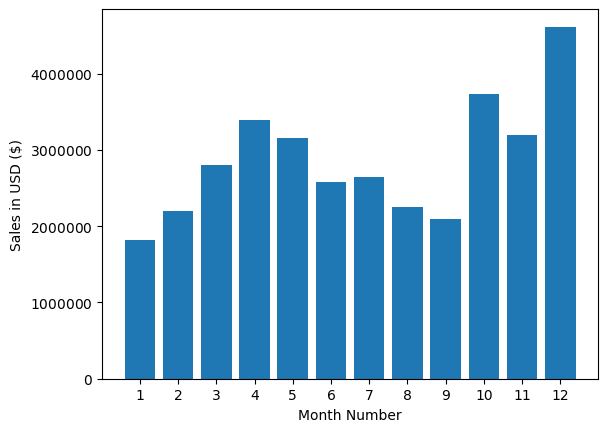

In [41]:
months = range(1, 13)
plt.bar(months, results)
plt.xticks(months) # see every month
plt.ylabel("Sales in USD ($)")
plt.xlabel('Month Number')
# Get the current Axes object
ax = plt.gca()
# Use ScalarFormatter to format the y-axis labels without scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.show()

### Q2. What city had the highest number of sales?

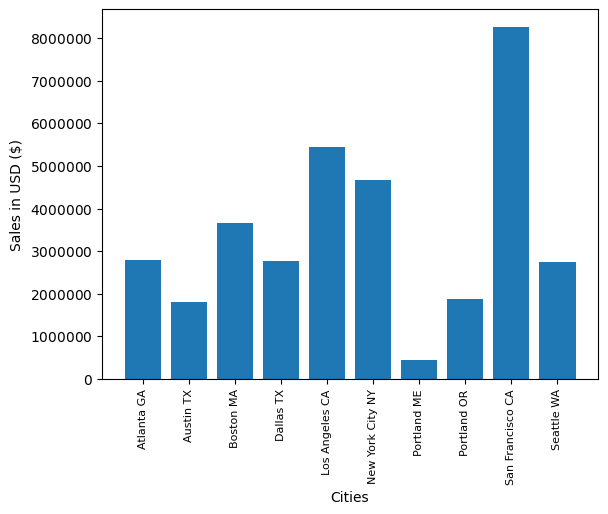

In [59]:
results = all_data.groupby('City').sum()['Sales']
results = results.reset_index()
plt.bar(results['City'], results['Sales'])
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD ($)')
# Get the current Axes object
ax = plt.gca()
# Use ScalarFormatter to format the y-axis labels without scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.show()


### Q3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [64]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] =all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA,12,38
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston MA,19,2
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City NY,19,29
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco CA,18,57
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco CA,18,35


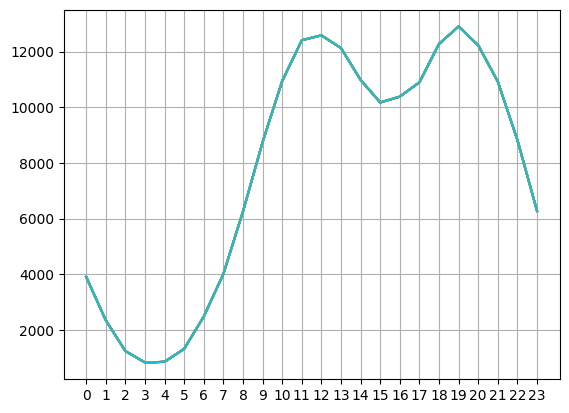

In [72]:
# Plotting this data
hours = [hour for hour, _ in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

### Q4. What products are most often sold together?

In [79]:
duplicated_df = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicated_df['Grouped'] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
duplicated_df = duplicated_df[['Order ID', 'Grouped']].drop_duplicates()
duplicated_df

/var/folders/ps/sqb3cdr56gdbw8gy4k2_svhw0000gn/T/ipykernel_37741/1236316438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['Grouped'] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
...,...,...
186798,222863,"27in FHD Monitor, Bose SoundSport Headphones"
186804,222868,"iPhone, Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones, AA Batteries (4-pack)"
186822,222884,"Google Phone, USB-C Charging Cable"


In [83]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

counter = Counter()
for row in duplicated_df['Grouped']:
    row_list = row.split(',')
    counter.update(Counter(combinations(row_list, 2)))

print(counter.most_common(10))
for key, value in counter.most_common(10):
    print(key, value)

[(('iPhone', ' Lightning Charging Cable'), 1005), (('Google Phone', ' USB-C Charging Cable'), 987), (('iPhone', ' Wired Headphones'), 447), (('Google Phone', ' Wired Headphones'), 414), (('Vareebadd Phone', ' USB-C Charging Cable'), 361), (('iPhone', ' Apple Airpods Headphones'), 360), (('Google Phone', ' Bose SoundSport Headphones'), 220), (('Vareebadd Phone', ' Wired Headphones'), 143), ((' USB-C Charging Cable', ' Wired Headphones'), 120), (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]
('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


### Q5. What product sold the most and why it sold the most

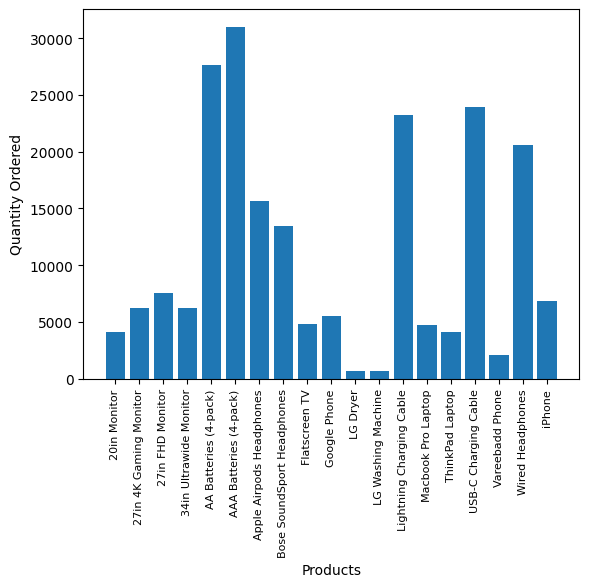

In [92]:
results = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()

plt.bar(results['Product'], results['Quantity Ordered'])
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

/var/folders/ps/sqb3cdr56gdbw8gy4k2_svhw0000gn/T/ipykernel_37741/3289867276.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results['Product'], rotation='vertical', size=8)


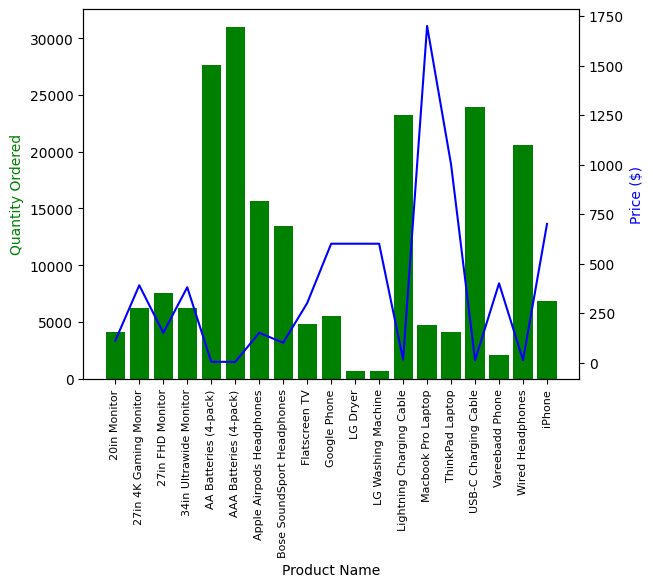

In [118]:
# The fact that batteries are highest sold and LG dryer is least, is probaby related to the fact that batteries are much cheaper 
# the dryer. I'm going to superimpose the price of the product over the above quantity sold graph to prove this hypothesis.

prices = all_data.groupby('Product')['Price Each'].mean().reset_index()
prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(results['Product'], results['Quantity Ordered'], color='g')
ax2.plot(results['Product'], prices['Price Each'], 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(results['Product'], rotation='vertical', size=8)

plt.show()